<table align="center">
  <td align="center">
    <a target="_blank" href="http://inspiredk.org">
    <img align="center" src="https://i.ibb.co/Z6HZPSbH/Inspired-K-org-Logo-No-Whitespace-Extra-Small.png">InspiredK.org Website</a>
  </td>
  
  <td align="center">
    <a target="_blank" href="https://colab.research.google.com/github/InspiredK-organization/MITintrotodeeplearning/blob/master/lab1/solutions/TF_Part1_Intro_Solution.ipynb">
    <img align="center" src="https://i.ibb.co/2P3SLwK/colab.png"/>Run in Google Colab</a>
  </td>
</table>

# Copyright Information


In [ ]:
# Copyright 2025 MIT Introduction to Deep Learning. All Rights Reserved.
#
# Licensed under the MIT License. You may not use this file except in compliance
# with the License. Use and/or modification of this code outside of MIT Introduction
# to Deep Learning must reference:
#
# © MIT Introduction to Deep Learning
# http://introtodeeplearning.com
#
# Original lab is adopted from http://introtodeeplearning.com
# Lab is edited by http://InspiredK.org

# Lab 1: Intro to TensorFlow and Music Generation with RNNs

In this lab, you'll get exposure to using TensorFlow and learn how it can be used for solving deep learning tasks. Go through the code and run each cell. Along the way, you'll encounter several ***TODO*** blocks -- follow the instructions to fill them out before running those cells and continuing.


# Part 1: Intro to TensorFlow

## 0.1 Install TensorFlow

TensorFlow is a software library extensively used in machine learning. Here we'll learn how computations are represented and how to define a simple neural network in TensorFlow. For all the TensorFlow labs in Introduction to Deep Learning 2025, we'll be using TensorFlow 2, which affords great flexibility and the ability to imperatively execute operations, just like in Python. You'll notice that TensorFlow 2 is quite similar to Python in its syntax and imperative execution. Let's install TensorFlow and a couple of dependencies.


In [ ]:
import tensorflow as tf

# Download and import the MIT Introduction to Deep Learning package
!pip install mitdeeplearning --quiet
import mitdeeplearning as mdl

import numpy as np # For nparrays
import matplotlib.pyplot as plt # For graphical visualizations of different statistics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 28.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.5/148.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.0/400.0 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.1/68.1 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.3 MB/s eta 0:00

## 1.1 Why is TensorFlow called TensorFlow?

TensorFlow is called 'TensorFlow' because it handles the flow (node/mathematical operation) of Tensors, which are data structures that you can think of as multi-dimensional arrays. Tensors are represented as n-dimensional arrays of base dataypes such as a string or integer -- they provide a way to generalize vectors and matrices to higher dimensions.

The ```shape``` of a Tensor defines its number of dimensions and the size of each dimension. The ```rank``` of a Tensor provides the number of dimensions (n-dimensions) -- you can also think of this as the Tensor's order or degree.

Let's first look at 0-d Tensors, of which a scalar is an example:

In [ ]:
sport = tf.constant("Tennis", tf.string)
number = tf.constant(1.41421356237, tf.float64)

print("`sport` is a {}-d Tensor".format(tf.rank(sport).numpy()))
print("`number` is a {}-d Tensor".format(tf.rank(number).numpy()))

`sport` is a 0-d Tensor
`number` is a 0-d Tensor


Vectors and lists can be used to create 1-d Tensors:

In [ ]:
sports = tf.constant(["Tennis", "Basketball"], tf.string)
numbers = tf.constant([3.141592, 1.414213, 2.71821], tf.float64)

print("`sports` is a {}-d Tensor with shape: {}".format(tf.rank(sports).numpy(), tf.shape(sports)))
print("`numbers` is a {}-d Tensor with shape: {}".format(tf.rank(numbers).numpy(), tf.shape(numbers)))

`sports` is a 1-d Tensor with shape: [2]
`numbers` is a 1-d Tensor with shape: [3]


Next we consider creating 2-d (i.e., matrices) and higher-rank Tensors. For examples, in future labs involving image processing and computer vision, we will use 4-d Tensors. Here the dimensions correspond to the number of example images in our batch, image height, image width, and the number of color channels.

In [ ]:
### Defining multi-dimensional Tensors ###

'''TODO: Define a 2-dimensional Tensor'''
matrix = tf.constant([[1.0, 2.0, 3.0, 4.0], [5.0, 6.0, 7.0, 8.0]]) # This tensor has a shape of 2 x 4 (2 rows, 4 columns).
# matrix = # TODO

assert isinstance(matrix, tf.Tensor), "matrix must be a tf Tensor object" # Is the object a Tensor?
assert tf.rank(matrix).numpy() == 2 # Is it two-dimensional?

In [ ]:
'''TODO: Define a 4-dimensional Tensor.'''
# Use tf.zeros to initialize a 4-d Tensor of zeros with size 10 x 256 x 256 x 3.
#   You can think of this as 10 images where each image is RGB 256 x 256.
images = tf.zeros([10, 256, 256, 3]) # This tensor contains all zeros, but in actual implementations there would be a wide variety of values.
# images = # TODO

assert isinstance(images, tf.Tensor), "matrix must be a tf Tensor object" # Is the object a Tensor?
assert tf.rank(images).numpy() == 4, "matrix must be of rank 4" # Is it four-dimensional?
assert tf.shape(images).numpy().tolist() == [10, 256, 256, 3], "matrix is incorrect shape" # Does it have the correct shape?

As you have seen, the ```shape``` of a Tensor provides the number of elements in each Tensor dimension. The ```shape``` is quite useful, and we'll use it often. You can also use slicing to access subtensors within a higher-rank Tensor:

In [ ]:
row_vector = matrix[1] # Get the second row at index 1.
column_vector = matrix[:, 1] # Get the second column at index 1.
scalar = matrix[0, 1] # Get the value in the first row (index 0) and second column (index 1).

print("`row_vector`: {}".format(row_vector.numpy()))
print("`column_vector`: {}".format(column_vector.numpy()))
print("`scalar`: {}".format(scalar.numpy()))

`row_vector`: [5. 6. 7. 8.]
`column_vector`: [2. 6.]
`scalar`: 2.0


## 1.2 Computations on Tensors

A convenient way to think about and visualize computations in TensorFlow is in terms of graphs. We can define this graph in terms of Tensors, which hold data, and the mathematical operations that act on these Tensors in some order. Let's look at a simple example, and define this computation using TensorFlow:

![alt text](https://raw.githubusercontent.com/MITDeepLearning/introtodeeplearning/2025/lab1/img/add-graph.png)

In [ ]:
# Create the inputs from the graph and initialize their values.
a = tf.constant(15)
b = tf.constant(61)

# Add them together.
c1 = tf.add(a, b)
c2 = a + b # TensorFlow overrides the "+" operation so that it can be used on Tensors.
print(c1)
print(c2)

tf.Tensor(76, shape=(), dtype=int32)
tf.Tensor(76, shape=(), dtype=int32)


Notice how we've created a computation graph consisting of TensorFlow operations, and how  the output is a Tensor with value 76 -- we've just created a computation graph consisting of operations, and it's executed them and given us back the result.

Now let's consider a slightly more complicated example:

![alt text](https://raw.githubusercontent.com/MITDeepLearning/introtodeeplearning/2025/lab1/img/computation-graph.png)

Here, we take two inputs, `a, b`, and compute an output `e`. Each node in the graph represents an operation that takes some input, does some computation, and passes its output to another node.

Let's define a simple function in TensorFlow to construct this computation function:

In [ ]:
# Construct a computation function based on the above graph.
def func(a, b):
  '''TODO: Define the operation for c, d, e (use tf.add, tf.subtract, tf.multiply).'''
  c = tf.add(a, b) # Add a and b.
  # c = # TODO
  d = tf.subtract(b, 1) # Subtract 1 from b.
  # d = # TODO
  e = tf.multiply(c, d) # Multiply c and d.
  # e = # TODO
  return e

Now, we can call this function to execute the computation graph given some inputs `a,b`:

In [ ]:
# Here are some example values for a and b.
a, b = 1.5, 2.5
# Call the computation function on these inputs.
e_out = func(a, b)
# c = 1.5 + 2.5 = 4
# d = 2.5 - 1 = 1.5
# e = 4 * 1.5 = 6.0
print(e_out) # 6.0

tf.Tensor(6.0, shape=(), dtype=float32)


Notice how our output is a Tensor with value defined by the output of the computation, and that the output has no shape as it is a single scalar value.

## 1.3 Neural networks in TensorFlow
We can also define neural networks in TensorFlow. TensorFlow uses a high-level API called [Keras](https://www.tensorflow.org/guide/keras) that provides a powerful, intuitive framework for building and training deep learning models.

Let's first consider the example of a simple perceptron defined by just one dense layer: $ y = \sigma(Wx + b)$, where $W$ represents a matrix of weights, $b$ is a bias, $x$ is the input, $\sigma$ is the sigmoid activation function, and $y$ is the output. We can also visualize this operation using a graph:

![alt text](https://raw.githubusercontent.com/MITDeepLearning/introtodeeplearning/2025/lab1/img/computation-graph-2.png)

Tensors can flow through abstract types called [```Layers```](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer) -- the building blocks of neural networks. ```Layers``` implement common neural networks operations, and are used to update weights, compute losses, and define inter-layer connectivity. We will first define a ```Layer``` to implement the simple perceptron defined above.

In [ ]:
### Defining a custom network layer ###

class OurDenseLayer(tf.keras.layers.Layer):
  def __init__(self, n_output_nodes):
    super(OurDenseLayer, self).__init__()
    self.n_output_nodes = n_output_nodes

  def build(self, input_shape):
    d = int(input_shape[-1])
    # Define and initialize parameters - a weight matrix W and bias b.
    self.W = self.add_weight(name="weight", shape=[d, self.n_output_nodes]) # These are the weights.
    self.b = self.add_weight(name="bias", shape=[1, self.n_output_nodes]) # These are the biases.
    # Note: parameter initialization is random.

  def call(self, x):
    '''TODO: define the operation for z (hint: use tf.matmul)'''
    z = tf.matmul(x, self.W) + self.b # This is the operation that combines the inputs, weights, and biases.
    # z = # TODO

    '''TODO: define the operation for out (hint: use tf.sigmoid)'''
    y = tf.sigmoid(z) # This is the function 'sigma' that reaches the final output.
    # y = # TODO
    return y

tf.keras.utils.set_random_seed(1) # Since layer parameters are initialized randomly, we will set a seed for reproducibility.
layer = OurDenseLayer(3) # Define the dense layer to have three outputs.
layer.build((1,2)) # Tell the dense layer our input shape.
x_input = tf.constant([[1,2.]], shape=(1,2)) # Test our dense layer with an input.
y = layer.call(x_input) # Use the layer on that input.

print(y.numpy())
mdl.lab1.test_custom_dense_layer_output(y) # Use a test to determine if the layer's output is correct.

[[0.27064407 0.1826951  0.50374055]]
[PASS] test_custom_dense_layer_output


True

Conveniently, TensorFlow has defined a number of ```Layers``` that are commonly used in neural networks, for example a [```Dense```](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable). Now, instead of using a single ```Layer``` to define our simple neural network, we'll use the  [`Sequential`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/Sequential) model from Keras and a single [`Dense` ](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/layers/Dense) layer to define our network. With the `Sequential` API, you can readily create neural networks by stacking together layers like building blocks.

In [ ]:
### Defining a neural network using Sequential ###

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

n_output_nodes = 3 # Define the number of outputs (3).

model = Sequential() # Use Sequential to create an empty model.

'''TODO: Define a dense (fully connected) layer to compute z'''
# Remember that dense layers are defined by the parameters W and b! You can read more about the initialization of W and b in the TensorFlow documentation:
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable
dense_layer = Dense(n_output_nodes, activation='sigmoid') # Create a built-in Dense layer that is defined the same way as our custom layer.
# dense_layer = # TODO

model.add(dense_layer) # Add the built-in Dense layer to the model.

That's it! We've defined our model using the Sequential API. Now, we can test it out using an example input:

In [ ]:
x_input = tf.constant([[1,2.]], shape=(1,2)) # Use the model with the same example input from before.

'''TODO: feed input into the model and predict the output!'''
model_output = model(x_input).numpy() # Test our model with that input.
# model_output = # TODO
print(model_output) # The output will be different as the model's parameters are random.

[[0.18752205 0.23909675 0.3213029 ]]


In addition to defining models using the `Sequential` API, we can also define neural networks by directly subclassing the [`Model`](https://www.tensorflow.org/api_docs/python/tf/keras/Model?version=stable) class, which groups layers together to enable model training and inference. The `Model` class captures what we refer to as a "model" or as a "network". Using Subclassing, we can create a class for our model, and then define the forward pass through the network using the `call` function. Subclassing affords the flexibility to define custom layers, custom training loops, custom activation functions, and custom models. Let's define the same neural network as above now using Subclassing rather than the `Sequential` model.

In [ ]:
### Create a custom model using subclassing ###

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class SubclassModel(tf.keras.Model):
  # In __init__, we define the model's layers.
  def __init__(self, n_output_nodes):
    super(SubclassModel, self).__init__()
    '''TODO: Our model consists of a single Dense layer. Define this layer.'''
    self.dense_layer = Dense(n_output_nodes, activation='sigmoid') # Define the model with one built-in Dense layer.
    # self.dense_layer = '''TODO: Dense Layer'''

  # Define the call function that lets our model recieve inputs and provide outputs.
  def call(self, inputs):
    return self.dense_layer(inputs)

Just like the model we built using the `Sequential` API, let's test out our `SubclassModel` using an example input.



In [ ]:
n_output_nodes = 3 # The number of outputs (3).
model = SubclassModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2)) # Again, use the same example input from before.

print(model.call(x_input)) # Again, the output will be different as the model's parameters are still random.

tf.Tensor([[0.82794297 0.15568398 0.567044  ]], shape=(1, 3), dtype=float32)


Importantly, Subclassing affords us a lot of flexibility to define custom models. For example, we can use boolean arguments in the `call` function to specify different network behaviors, for example different behaviors during training and inference. Let's suppose under some instances we want our network to simply output the input, without any perturbation. We define a boolean argument `isidentity` to control this behavior:

In [ ]:
### Defining a custom model using subclassing and adding custom behavior ###

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class IdentityModel(tf.keras.Model):
  # As before, in __init__ we define the model's layers.
  def __init__(self, n_output_nodes):
    super(IdentityModel, self).__init__()
    self.dense_layer = tf.keras.layers.Dense(n_output_nodes, activation='sigmoid') # Define the model like before with one built-in Dense layer.

  '''TODO: Implement the behavior where the network outputs the input, unchanged, under control of the isidentity argument.'''
  def call(self, inputs, isidentity=False): # Define the call function like before, but with a new parameter (isidentity).
    if isidentity: # If isidentity is True,
      return inputs # then return the inputs as-is.
    else: # If isidentity is False,
      x = self.dense_layer(inputs) # then send the inputs through our model
      return x # and provide an output.

  # def call(self, inputs, isidentity=False):
    # TODO

Let's test this behavior:

In [ ]:
n_output_nodes = 3 # The number of outputs (3).
model = IdentityModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2)) # Yet again, use the same example input from before.
'''TODO: pass the input into the model and call with and without the input identity option.'''
out_activate = model.call(x_input, isidentity=False) # Use the model on this input with isidentity set to False.
# out_activate = # TODO
out_identity = model.call(x_input, isidentity=True) # Then, use the model on the input with isidentity set to True.
# out_identity = # TODO

print("Network output with activation: {}\nNetwork identity output: {}".format(out_activate.numpy(), out_identity.numpy())) # Compare the outputs.

Network output with activation: [[0.5746787  0.6182241  0.88219965]]
Network identity output: [[1. 2.]]


Now that we have learned how to define `Layers` as well as neural networks in TensorFlow using both the `Sequential` and Subclassing APIs, we're ready to turn our attention to how to actually implement network training with backpropagation.

## 1.4 Automatic differentiation in TensorFlow

[Automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation)
is one of the most important parts of TensorFlow and is the backbone of training with
[backpropagation](https://en.wikipedia.org/wiki/Backpropagation). We will use the TensorFlow GradientTape [`tf.GradientTape`](https://www.tensorflow.org/api_docs/python/tf/GradientTape?version=stable) to trace operations for computing gradients later.

When a forward pass is made through the network, all forward-pass operations get recorded to a "tape"; then, to compute the gradient, the tape is played backwards. By default, the tape is discarded after it is played backwards; this means that a particular `tf.GradientTape` can only
compute one gradient, and subsequent calls throw a runtime error. However, we can compute multiple gradients over the same computation by creating a ```persistent``` gradient tape.

First, we will look at how we can compute gradients using GradientTape and access them for computation. We define the simple function $ y = x^2$ and compute the gradient:

In [ ]:
### Gradient computation using TensorFlow GradientTape ###

x = tf.Variable(3.0) # Create a given variable `x` equal to 3.0

# Create the gradient tape.
with tf.GradientTape() as tape:
  y = x ** 2 # Let's use the example of `y = x^2`

# With the gradient tape complete, we can find the gradient.
# The gradient is just the derivative of all mathematical operations in a given gradient tape.
dy_dx = tape.gradient(y, x)

assert dy_dx.numpy() == 6.0 # Is the gradient equal to 6?

In training neural networks, we use differentiation and stochastic gradient descent (SGD) to optimize a loss function. Now that we have a sense of how `GradientTape` can be used to compute and access derivatives, we will look at an example where we use automatic differentiation and SGD to find the minimum of $L=(x-x_f)^2$. Here $x_f$ is a variable for a desired value we are trying to optimize for; $L$ represents a loss that we are trying to  minimize. While we can clearly solve this problem analytically ($x_{min}=x_f$), considering how we can compute this using `GradientTape` sets us up nicely for future labs where we use gradient descent to optimize entire neural network losses.

Initializing x=[[-1.1012201]]
Final x=[[3.9997907]]


Text(0, 0.5, 'Value')

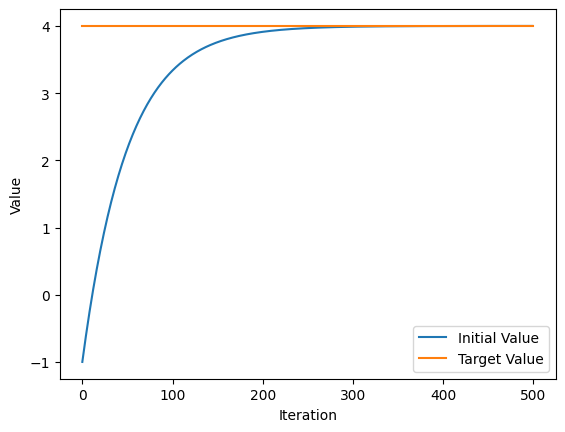

In [ ]:
### Function minimization with GradientTape and gradients ###

x = tf.Variable([tf.random.normal([1])]) # Create a single random value for the initial x.
print("Initializing x={}".format(x.numpy())) # Print the initial value

x_f = 4 # Create a target value that x should reach.
learning_rate = 1e-2 # Set a rate to change x to reach the target value.
iterations = 500 # Set a number of iterations to loop through.
history = [] # Create an empty list to store all x values for graphing.

# In each iteration, we compute the loss, compute the gradient of the loss, and update the x value based on the gradient.
for i in range(iterations):
  with tf.GradientTape() as tape:
    '''TODO: define the loss as described above'''
    loss = (x - x_f)**2 # Compute the loss as the difference between the initial and target values.
    # loss = # TODO

  grad = tape.gradient(loss, x) # Compute the gradient of the loss function (derivative).
  new_x = x - learning_rate*grad # Change the initial value to move it slightly towards the target value.
  x.assign(new_x) # Change the initial value to the new updated value.
  history.append(x.numpy()[0]) # Add the updated value to the graphing list.

print("Final x={}".format(x.numpy())) # Print the final value to see how close it is to the target value.

# Plot the changes of the initial value as it moves towards the target value.
plt.plot(history)
plt.plot([0, iterations],[x_f,x_f])
plt.legend(('Initial Value', 'Target Value'))
plt.xlabel('Iteration')
plt.ylabel('Value')

Try experimenting with different values for `learning_rate` and `iterations` to see what effects they have on the final value and the trend of the graph.

This process of taking an initial value and moving towards a target value is called Stochastic Gradient Descent (SGD). SGD is used in machine learning to optimize weights for higher model accuracy. Even though many other methods have been developed, it remains one of the most commonly used in machine learning for weight optimization.

`GradientTape` provides an extremely flexible framework for automatic differentiation. In order to backpropagate errors through a neural network, we track forward passes on the Tape, use this information to determine the gradients, and then use these gradients for optimization using SGD.
